<a href="https://colab.research.google.com/github/madachy/sd_incose/blob/master/Target_Shooter_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Target Shooter System

Run the cell below once at the beginning of each session. The output can then be cleared. There is also a method to permanently install se-lib to eliminate this step.

In [ ]:
!pip install se-lib

from selib import *

## Capability Requirements and Scenarios

The Target Shooter System desired capability is to destroy incoming targets.  It is required to be timely, lethal and within budget. This capability analysis will vary weapons technology and number of shooters.

The requirements and objective Measures of Effectiveness (MOE) are shown below.  The primary MOE analyzed is target destruction response time with a mean time objective of less than 2 minutes.

Simulation experiments are performed with the two factors at two levels (2 * 2 = 4 combinations).  Vary weapons technology and number of shooters.

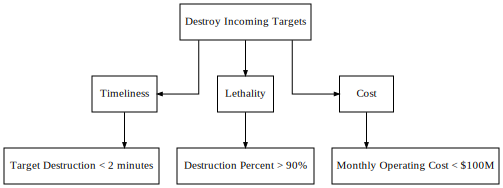

In [113]:
# target shooter system requirements
target_destruction_time = 2

requirements = [("Destroy Incoming Targets", "Timeliness"),
                ("Destroy Incoming Targets", "Lethality"),
                 ("Destroy Incoming Targets", "Cost"),
                  ("Timeliness", f"Target Destruction < {target_destruction_time} minutes"),
               ("Lethality", "Destruction Percent > 90%"),
               ("Cost", "Monthly Operating Cost < $100M"),
                 ]
tree(requirements)

## Parameters

In [111]:
# input parameters
num_shooters = 1
num_targets = 10
weapons_technology = "High"
if weapons_technology == "High": shooting_time = 'np.random.normal(.8, .2)'
if weapons_technology == "Normal": shooting_time = 'np.random.normal(1, .3)'

costs = [100, 150, 125, 175]

## Discrete Event Simulation Model

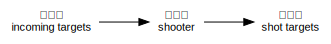

In [110]:
# target shooter system

if weapons_technology == "High": shooting_time = 'np.random.normal(.8, .2)'
if weapons_technology == "Normal": shooting_time = 'np.random.normal(1, .3)'

init_de_model()
add_source('incoming targets',
           entity_name="target",
           num_entities = num_targets,
           connections={'shooter': 1},
           interarrival_time='np.random.exponential(3)')

add_server(name='shooter',
           connections={'shot targets': 1},
           service_time=shooting_time,
           capacity = num_shooters)

add_terminate('shot targets')

draw_model_diagram(filename="target_shooter_model_diagram", format='svg')

In [ ]:
model_data, target_entity_data = run_model()
print(model_data)
print(target_entity_data)

def calculate_time_difference(simulation_output):
    time_differences = {}
    for entity, data in simulation_output.items():
        time_differences[entity] = data['departure'] - data['arrival']
    return time_differences

time_differences = calculate_time_difference(target_entity_data)
# Calculate the percentage of time differences less than 2
count = sum(1 for time in time_differences if time_differences[time] < 1.2)
percentage = count / len(time_differences) * 100

print(f'{target_entity_data =}')
# Print the percentage
print(f"The percentage of time differences less than 2 is {percentage:.2f}%")

2.176527516994511: target 1 entered from incoming targets
2.176527516994511: target 1 incoming targets -> shooter
2.176527516994511: target 1 requesting shooter resource 
2.176527516994511: target 1 granted shooter resource waiting time 0.0
3.084447503640406: target 1 completed using shooter resource with service time 0.9079199866458953
3.084447503640406: target 1 shooter -> shot targets
3.084447503640406: target 1 leaving system at shot targets 
7.171173498063569: target 2 entered from incoming targets
7.171173498063569: target 2 incoming targets -> shooter
7.171173498063569: target 2 requesting shooter resource 
7.171173498063569: target 2 granted shooter resource waiting time 0.0
7.9146347922630635: target 2 completed using shooter resource with service time 0.7434612941994947
7.9146347922630635: target 2 shooter -> shot targets
7.9146347922630635: target 2 leaving system at shot targets 
8.912707649585016: target 3 entered from incoming targets
8.912707649585016: target 3 incoming 

### Response Times

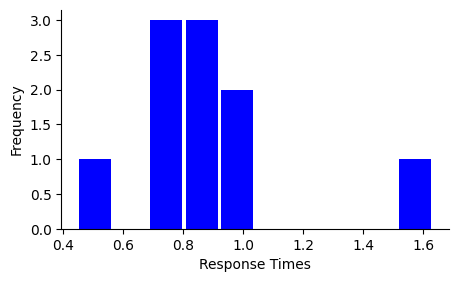

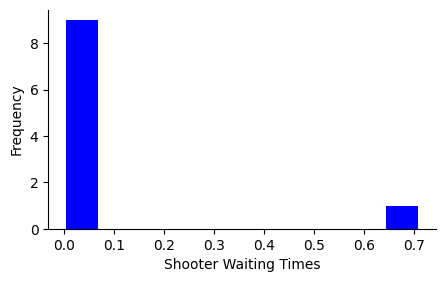

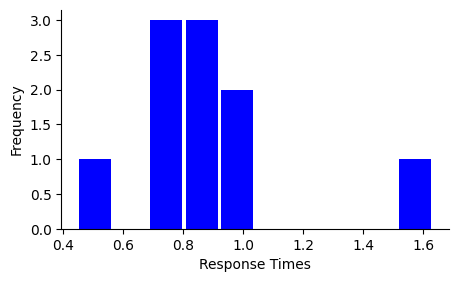

In [ ]:
plot_histogram(model_data['shooter']['waiting_times'], xlabel="Shooter Waiting Times")
plot_histogram(time_differences.values(), xlabel="Response Times")

In [ ]:
time_differences

{1: 0.9079199866458953,
 2: 0.7434612941994949,
 3: 0.9366881186919844,
 4: 1.0361291497283762,
 5: 0.8840873976367334,
 6: 0.7501365969378941,
 7: 0.6837798621928535,
 8: 0.44633619168285676,
 9: 0.8133013345440752,
 10: 1.6323946816127588}

## Monte Carlo Simulation and Output Analysis

In [ ]:
# Target Shooter System Monte Carlo Simulation and Output Analysis

import numpy as np

# evaluate measure of performance to attain objective mean response time < 2
mean_response_times = []

response_times_dict={}

weapons_technology = "High"

for num_shooters in [1, 2]:
    for run in range(10):
        response_times = []

        if weapons_technology == "High": shooting_time = 'np.random.normal(.8, .2)'
        if weapons_technology == "Normal": shooting_time = 'np.random.normal(1, .3)'

        init_de_model()
        add_source('incoming targets',
                entity_name="target",
                num_entities = 10,
                connections={'shooter': 1},
                interarrival_time='np.random.exponential(3)')

        add_server(name='shooter',
                connections={'shot targets': 1},
                service_time='np.random.normal(1, .3)',
                capacity = num_shooters)

        add_terminate('shot targets')

        model_data, target_entity_data = run_model(verbose=False)

        response_times = [target['departure'] - target['arrival'] for target in target_entity_data.values()]
        """
        for data in target_entity_data.values():
            response_time = data['departure'] - data['arrival']
            response_times.append(response_time)
        """

        # Calculate the percentage of response times less than 2
        count = sum(1 for time in response_times if time < 1.2)
        percentage = count / len(response_times) * 100

        mean_response_times.append(np.mean(response_times))
        response_times_dict[num_shooters] = mean_response_times

mean_response_times
response_times_dict

{1: [0.8820229037366086,
  1.3376662166719484,
  1.383527280234825,
  1.678767603414434,
  1.1831991522465193,
  1.3494478395885339,
  0.9507252316436363,
  0.8003492992192459,
  0.824499820026033,
  1.041913645797154,
  0.9538221731056957,
  1.1057516020543576,
  1.0531078185337446,
  1.097606737122279,
  0.9336623728767647,
  0.8971835139644909,
  0.9969330306052614,
  1.112163451179173,
  0.9783479123634546,
  1.0249462526409323],
 2: [0.8820229037366086,
  1.3376662166719484,
  1.383527280234825,
  1.678767603414434,
  1.1831991522465193,
  1.3494478395885339,
  0.9507252316436363,
  0.8003492992192459,
  0.824499820026033,
  1.041913645797154,
  0.9538221731056957,
  1.1057516020543576,
  1.0531078185337446,
  1.097606737122279,
  0.9336623728767647,
  0.8971835139644909,
  0.9969330306052614,
  1.112163451179173,
  0.9783479123634546,
  1.0249462526409323]}

In [ ]:
# Target Shooter System Monte Carlo Simulation and Output Analysis

import numpy as np

# evaluate measure of performance to attain objective mean response time < 2

response_times_dict={}


num_shooters = 1

scenarios = [{'weapons_technology': weapons_technology, 'num_shooters': num_shooters} for weapons_technology in ["Normal", "High"] for num_shooters in [1,2]]

for scenario in scenarios:
    mean_response_times = []
    response_time_goal_attainment_percent = []
    response_times_dict
    for run in range(30):
        print(scenario)
        response_times = []

        if scenario['weapons_technology'] == "High": shooting_time = 'np.random.normal(.8, .2)'
        if scenario['weapons_technology'] == "Normal": shooting_time = 'np.random.normal(1, .3)'

        init_de_model()
        add_source('incoming targets',
                entity_name="target",
                num_entities = 10,
                connections={'shooter': 1},
                interarrival_time='np.random.exponential(3)')

        add_server(name='shooter',
                connections={'shot targets': 1},
                service_time=shooting_time,
                capacity = num_shooters)

        add_terminate('shot targets')

        model_data, target_entity_data = run_model(verbose=False)

        response_times = [target['departure'] - target['arrival'] for target in target_entity_data.values()]

        # Calculate the percentage of response times less than 2
        count = sum(1 for time in response_times if time < 1.2)
        percentage = count / len(response_times) * 100
        response_time_goal_attainment_percent.append(percentage)

        mean_response_times.append(np.mean(response_times))
        response_times_dict[(scenario['weapons_technology'], scenario['num_shooters'])] = mean_response_times

response_time_goal_attainment_percent
mean_response_times
response_times_dict

{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_technology': 'Normal', 'num_shooters': 1}
{'weapons_te

{('Normal', 1): [1.1375963942114562,
  1.2948267013404071,
  1.2530317200696544,
  1.194089464247344,
  1.438542375805199,
  1.3441699458611787,
  1.0435637926323822,
  1.094058910225329,
  1.1148459015080676,
  1.1452791097108515,
  1.2073402555517319,
  1.20484801842809,
  1.1070137674885023,
  2.312716673178511,
  1.1803806073821268,
  1.317378524407382,
  1.1063169419252685,
  0.9617534464126324,
  0.9714575107955602,
  1.2065967995969424,
  1.1339488018879205,
  1.0871844623270874,
  0.8699142927515002,
  0.977709254213061,
  1.6021062083888218,
  1.1382629266806916,
  1.1367390128796355,
  1.3166341974810158,
  1.690919815904726,
  1.3911602634668083],
 ('Normal', 2): [1.0229887713869341,
  1.4825256225281727,
  1.0126457061221956,
  1.132114812154068,
  1.5887207084837358,
  0.9887694619413694,
  1.8829052621295688,
  1.252927579047981,
  1.1682036363979331,
  1.3047216844920981,
  1.0092747427529036,
  1.2537716840834932,
  1.3255436916945158,
  1.1903046222702982,
  1.02124293

In [ ]:
response_time_goal_attainment_percent
mean_response_times
response_times_dict

{('Normal', 1): [1.1375963942114562,
  1.2948267013404071,
  1.2530317200696544,
  1.194089464247344,
  1.438542375805199,
  1.3441699458611787,
  1.0435637926323822,
  1.094058910225329,
  1.1148459015080676,
  1.1452791097108515,
  1.2073402555517319,
  1.20484801842809,
  1.1070137674885023,
  2.312716673178511,
  1.1803806073821268,
  1.317378524407382,
  1.1063169419252685,
  0.9617534464126324,
  0.9714575107955602,
  1.2065967995969424,
  1.1339488018879205,
  1.0871844623270874,
  0.8699142927515002,
  0.977709254213061,
  1.6021062083888218,
  1.1382629266806916,
  1.1367390128796355,
  1.3166341974810158,
  1.690919815904726,
  1.3911602634668083],
 ('Normal', 2): [1.0229887713869341,
  1.4825256225281727,
  1.0126457061221956,
  1.132114812154068,
  1.5887207084837358,
  0.9887694619413694,
  1.8829052621295688,
  1.252927579047981,
  1.1682036363979331,
  1.3047216844920981,
  1.0092747427529036,
  1.2537716840834932,
  1.3255436916945158,
  1.1903046222702982,
  1.02124293

### Mean Response Times

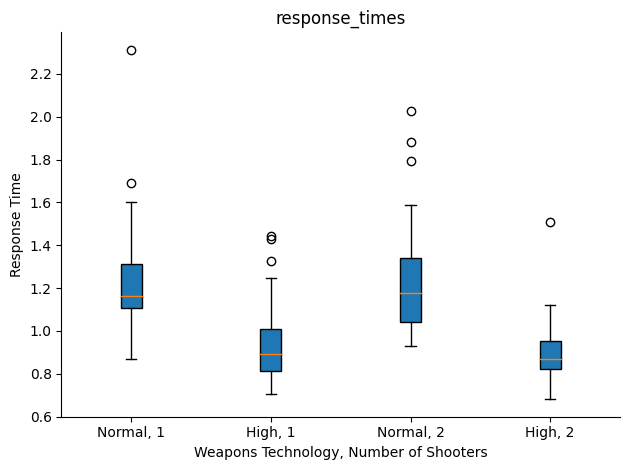

In [ ]:
import matplotlib.pyplot as plt
# boxplots

#data_lists = normal_1_response_times, high_1_response_times, normal_2_response_times, high_2_response_times

data_lists = response_times_dict[('Normal', 1)], response_times_dict[('High', 1)], response_times_dict[('Normal', 2)], response_times_dict[('High', 2)]  

figure, axis1 = plt.subplots()
#axis1.set_ylim([40, 90])
axis1.set_title('response_times')
axis1.set_xlabel('Weapons Technology, Number of Shooters')
axis1.set_ylabel('Response Time')
axis1.boxplot(data_lists, widths=0.15, vert=True, patch_artist=True)
axis1.set(xticklabels = ['Normal, 1', 'High, 1', 'Normal, 2', 'High, 2'])

plt.tight_layout()
plt.show()

In [ ]:
target_entity_data

{1: {'arrival': 3.666934015907888,
  'nodes': [('shooter', 4.332975064113298),
   ('shot targets', 4.332975064113298)],
  'departure': 4.332975064113298},
 2: {'arrival': 4.595571094081298,
  'nodes': [('shooter', 5.032332995968412),
   ('shot targets', 5.032332995968412)],
  'departure': 5.032332995968412},
 3: {'arrival': 5.5083871623064,
  'nodes': [('shooter', 6.554147978736331),
   ('shot targets', 6.554147978736331)],
  'departure': 6.554147978736331},
 4: {'arrival': 10.279999905224324,
  'nodes': [('shooter', 11.380605327204258),
   ('shot targets', 11.380605327204258)],
  'departure': 11.380605327204258},
 5: {'arrival': 11.374158747517361,
  'nodes': [('shooter', 12.4526943554175), ('shot targets', 12.4526943554175)],
  'departure': 12.4526943554175},
 6: {'arrival': 18.76104862438752,
  'nodes': [('shooter', 19.600675946078173),
   ('shot targets', 19.600675946078173)],
  'departure': 19.600675946078173},
 7: {'arrival': 19.373937784952965,
  'nodes': [('shooter', 20.2994368

In [ ]:
model_data

{'incoming targets': {'type': 'source',
  'entity_name': 'target',
  'num_entities': 10,
  'connections': {'shooter': 1},
  'interarrival_time': 'np.random.exponential(3)',
  'arrivals': [3.666934015907888,
   4.595571094081298,
   5.5083871623064,
   10.279999905224324,
   11.374158747517361,
   18.76104862438752,
   19.373937784952965,
   20.209394371309514,
   20.48309531208104,
   27.457758561608514]},
 'shooter': {'type': 'server',
  'resource': <simpy.resources.resource.Resource at 0x7f3184b2a890>,
  'connections': {'shot targets': 1},
  'service_time': 'np.random.normal(.8, .2)',
  'waiting_times': [0.0,
   0.0,
   0.0,
   0.0,
   0.006446579686896214,
   0.0,
   0.2267381611252084,
   0.0900424450723385,
   0.43631418937961186,
   0.0],
  'service_times': [0.6660410482054105,
   0.43676190188711367,
   1.0457608164299304,
   1.1006054219799335,
   1.0720890282132418,
   0.839627321690653,
   0.6987608703036802,
   0.6199726850788004,
   0.9248003458147975,
   0.8945734850037814

### MOE Confidence Intervals


In [ ]:
import scipy.stats as st

# 95% confidence intervals
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html, last term is standard error of mean

data = response_times_dict[('Normal', 1)]

print("normal_1_response_times mean 95% CI  = ", st.norm.interval(alpha=0.95, loc=np.mean(data), scale=(np.std(data) / np.sqrt(np.size(data))))) 


normal_1_response_times mean 95% CI  =  (1.1375035431324363, 1.3278555299848895)


<ipython-input-100-aee6563236ab>:8: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  print("normal_1_response_times mean 95% CI  = ", st.norm.interval(alpha=0.95, loc=np.mean(data), scale=(np.std(data) / np.sqrt(np.size(data)))))


In [ ]:
## MOE Hypothesis Testing

### MOE Hypothesis Testing



In [ ]:
import statsmodels.api as sm

# hypothesis testing

print("Testing Variants for Destruction Time MOE Objective of 2 Minutes")

# 1-sided test
H0 = "mean < 2"
HA = "mean >= 2"
alpha = .05 # Significant level(α)
data = response_times_dict[('High', 2)]
value = .8

ztest_score, p_value = sm.stats.ztest(data, value = value, alternative = "larger")
print('\nhigh_2_response_times\n' + f'{ztest_score= :.2f}', f'{p_value= :.3f}')
if(p_value <  alpha):
  print(f"Reject null hypothesis {H0} and accept HA: {HA}")
else:
  print("Fail to reject null hypothesis H0: " + H0)

Testing Variants for Destruction Time MOE Objective of 2 Minutes

high_2_response_times
ztest_score= 3.83 p_value= 0.000
Reject null hypothesis mean < 2 and accept HA: mean >= 2


### Interaction Plots

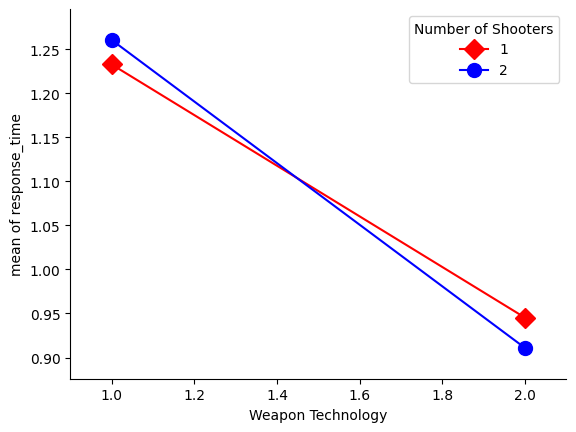

In [ ]:
# interaction plots
weapon_technology = [1, 2, 1, 2] # normal, high, normal, high
number_shooters = [1, 1, 2, 2]
mean_response_time = [np.mean(response_times_dict[('Normal', 1)]), np.mean(response_times_dict[('High', 1)]), np.mean(response_times_dict[('Normal', 2)]), np.mean(response_times_dict[('High', 2)])]

fig = interaction_plot(weapon_technology, number_shooters, mean_response_time, xlabel='Weapon Technology', ylabel='response_time', colors=['red', 'blue'], markers=['D', 'o'], ms=10)
plt.legend([1, 2], title = 'Number of Shooters')
plt.show()

### Systems Effectiveness

system_effectiveness=[0.8112408540436659, 1.057883379554339, 0.7933411026147686, 1.0977847420284346]


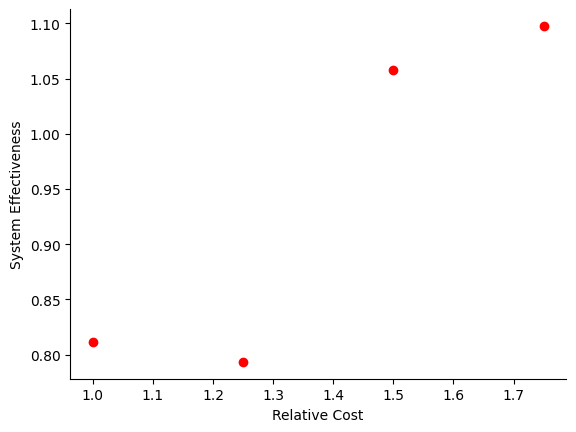

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot

system_effectiveness = [1/response_time for response_time in mean_response_time]
print(f'{system_effectiveness=}')

fig, axis = plt.subplots()
axis.scatter(relative_costs, system_effectiveness, color='red') 
axis.set(xlabel = "Relative Cost", ylabel='System Effectiveness',)
plt.show()

### Cost Effectiveness

cost_effectiveness=[0.008112408540436659, 0.007052555863695593, 0.006346728820918149, 0.006273055668733912]


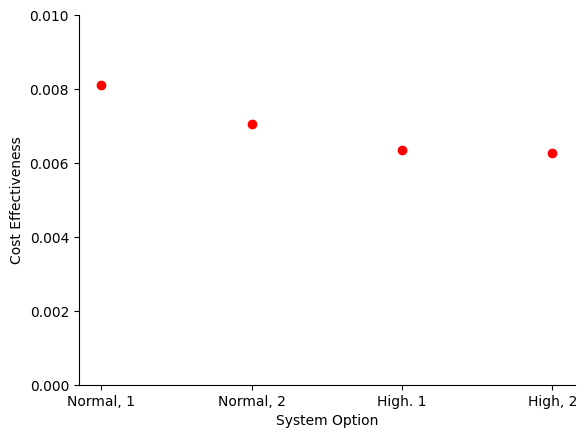

In [ ]:
relative_costs = [cost/100 for cost in costs]

cost_effectiveness = [se/cost for se, cost in zip(system_effectiveness, costs)]
print(f'{cost_effectiveness=}')

fig, axis = plt.subplots()
axis.scatter([1, 2, 3, 4], cost_effectiveness, color='red') 
axis.set(xlabel = "System Option", ylabel='Cost Effectiveness', ylim=(0, .01), xticks=[1, 2, 3, 4], xticklabels=["Normal, 1", "Normal, 2", "High. 1", "High, 2"]) # yticklabels=[None]*6
plt.show()